In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
import shutil,subprocess,os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms as rdmt
import numpy as np
# from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Geometry import rdGeometry as geom
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from ipywidgets import interact, interactive, fixed
from ipywidgets import interact, widgets
from IPython.display import display
import py3Dmol

In [3]:
# m1 = Chem.MolFromSmiles('C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N')
#m1 = Chem.MolFromSmiles('C1=CC2=C(C=C1O)C(=CN2)CCN')
##m1 = Chem.MolFromSmiles('C1=CC2=C(C=C1O)C(=CN2)CC[NH3+]')
##m1 = Chem.MolFromSmiles('Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O)([O-])OP(=O)([O-])O)[C@@H](O)[C@H]1O')
##m1 = Chem.MolFromSmiles('CC(=O)N[C@@H]1[C@@H](O)C[C@](O)(O[C@H]1[C@H](O)[C@H](O)CO)C([O-])=O')

##m1 = Chem.MolFromSmiles('C[NH+](C)C[C@H]1CCCC[C@@]1(C2=CC(=CC=C2)OC)O')

m1 = Chem.MolFromSmiles('CC(=O)N[C@@H]1[C@H](C[C@@](O[C@H]1[C@H]([C@H](CO)O)O)(C(=O)O)O)O')

# m1 = Chem.MolFromSmiles('CC(C)CC(C(=O)NC(CCCN=C(N)N)C(=O)N1CCCC1C(=O)NCC(=O)N)NC(=O)C(CC2=CC3=CC=CC=C3C=C2)NC(=O)C(CC4=CC=C(C=C4)O)NC(=O)C(CO)NC(=O)C(CC5=CNC6=CC=CC=C65)NC(=O)C(CC7=CN=CN7)NC(=O)C8CCC(=O)N8')
#m1 = Chem.MolFromSmiles('C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N')

# m1 = Chem.MolFromSmiles('Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O)([O-])OP(=O)([O-])O)[C@@H](O)[C@H]1O')
#m1 = Chem.MolFromSmiles('C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H](O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N')
#m1 = Chem.MolFromSmiles('C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N')

In [4]:
AllChem.CalcMolFormula(m1)
#m1.GetAtomWithIdx(5).GetDegree()

'C11H19NO9'

In [5]:
for at in m1.GetAtoms():
    #if at.GetAtomicNum() == 7:
    #    print(at.GetAtomicNum(),at.GetExplicitValence(),at.GetFormalCharge())
    '''
    if at.GetAtomicNum() == 7:
        print(at.GetAtomicNum())
        print(at.GetExplicitValence())
        print(at.GetFormalCharge())
    '''
    if at.GetAtomicNum() == 7 and at.GetExplicitValence()==1 and at.GetFormalCharge()==0:
        at.SetFormalCharge(1)
        #at.SetHybridization('sp3')
        at.SetNumExplicitHs(3)
        #print(at)
m1.UpdatePropertyCache()

In [6]:

m2 = Chem.AddHs(m1)
AllChem.EmbedMolecule(m2, params=AllChem.ETKDGv2())
#AllChem.MMFFOptimizeMolecule(m2,)
AllChem.MMFFOptimizeMolecule(m2, mmffVariant="MMFF94s")

0

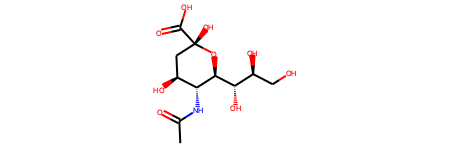

In [7]:
m1

In [18]:
#from cresset import flare
from rdkit import Chem
from rdkit.Chem import AllChem

deprotonate_cooh = AllChem.ReactionFromSmarts(
    "[C:1](=[O:2])-[OH1:3]>>[C:1](=[O:2])-[O-H0:3]")


In [19]:
mols = [m1]

In [23]:
[print(Chem.MolToSmiles(m)) for m in mols];


CC(=O)N[C@@H]1[C@@H](O)C[C@](O)(C(=O)O)O[C@H]1[C@@H](O)[C@@H](O)CO


In [24]:
mols_deprot = []
for m in mols:
    print(type(m))
    m_deprot = deprotonate_cooh.RunReactants((m,))
    mols_deprot.append(m_deprot[0][0] if m_deprot else m)
[print(Chem.MolToSmiles(m)) for m in mols_deprot];

<class 'rdkit.Chem.rdchem.Mol'>
CC(=O)N[C@@H]1[C@@H](O)C[C@](O)(C(=O)[O-])O[C@H]1[C@@H](O)[C@@H](O)CO


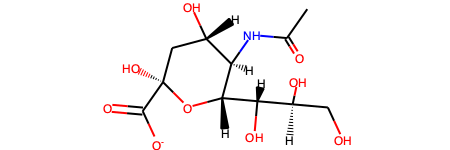

In [22]:
m_deprot[0][0]

In [ ]:
#w = Chem.SDWriter('foo.sdf')
#w.write(m2,-1)
m2 = Chem.AddHs(m2)

In [ ]:
m2

In [ ]:
#Chem.rdmolfiles.MolToSmiles(m2)

In [ ]:
print(Chem.MolToMolBlock(m2),file=open('foo.mol','w+'))